In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('blog_data.csv')

In [3]:
control = df[df['variation']=='control']
control = control['metric']
exp = df[df['variation']=='test']
exp = exp['metric']

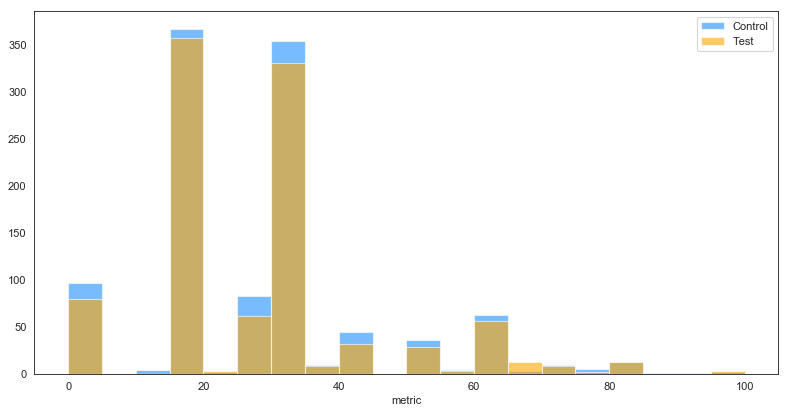

In [4]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.set_style("white")
bins = np.arange(0, 100 + 5, 5)

plt.figure(figsize=(12,6), dpi= 80)
sns.distplot(control, color="dodgerblue", label="Control", bins=bins, kde=False, **kwargs)
sns.distplot(exp, color="orange", label="Test", bins=bins, kde=False, **kwargs)
plt.legend();

In [5]:
# T-test assumes normality. Thus, need to apply Central Limit Theorem to get normally distributed sample of data.

# Function to sample with replacement
def get_sample(df, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(df)
        sample.append(x)
    return sample

# Function to calculate mean of sample
def get_sample_mean(sample):
    return sum(sample)/len(sample)

# Combine functions to create a sample distribution
def create_sample_distribution(df, dist_size=1000, n=500):
    sample_dist = [] 
    while len(sample_dist) != dist_size:
        sample = get_sample(df, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
        
    return sample_dist

# Create sample distributions of sample mean for control and target
ctrl_sample = create_sample_distribution(control)
exp_sample = create_sample_distribution(exp)

C:\Users\iblis3\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


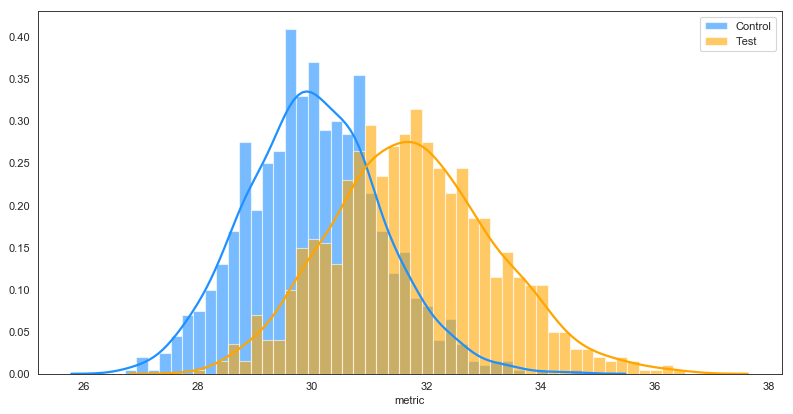

In [6]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.set_style("white")
bins = np.arange(min(ctrl_sample), max(exp_sample) + 0.2, 0.2)

plt.figure(figsize=(12,6), dpi= 80)
sns.distplot(ctrl_sample, color="dodgerblue", label="Control", bins=bins, **kwargs)
sns.distplot(exp_sample, color="orange", label="Test", bins=bins, **kwargs)
plt.xlabel('metric')
plt.legend();

In [7]:
np.var(control) == np.var(exp)

False

In [8]:
# Calculate statistical significance with two-sided Welch's t-test (which doesn't assume variance is equal between 
# the two samples). If p-value is very small, then reject null hypothesis.

# From scipy website:
# Calculate the T-test for the means of two independent samples of scores.
# This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
# This test assumes that the populations have identical variances by default.

stat.ttest_ind(exp_sample, ctrl_sample, equal_var=False)

Ttest_indResult(statistic=29.91730973381189, pvalue=6.269454104224279e-162)

In [9]:
# Above calculates whether or not difference is statistically significant. Below calculates size of difference.
# Cohen's d value = size of difference in means of two samples in terms of standard deviation.

# Function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # sample sizes
    n1, n2 = len(d1), len(d2)
    # variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # sample means
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

In [10]:
d = cohend(exp_sample, ctrl_sample)
print('Cohens d: %.3f' % d)

Cohens d: 1.338
